In [1]:
%matplotlib inline

import numpy as np
import scipy as sp
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# In Vino Veritas

<img src="http://www.winemaniacs.com/wp-content/uploads/2013/04/WineRotator-2000x925.jpg">

Can a winemaker predict how a wine will be received based on the chemical properties of the wine? Are there chemical indicators that correlate more strongly with the perceived "quality" of a wine?

In this problem we'll examine the wine quality dataset hosted on the <a href="https://archive.ics.uci.edu/ml/datasets/Wine+Quality">UCI website</a>. This data records 11 chemical properties (such as the concentrations of sugar, citric acid, alcohol, pH etc.) of thousands of red and white wines from northern Portugal, as well as the quality of the wines, recorded on a scale from 1 to 10. In this problem, we will only look at the data for *red* wine.

### Problem 1: Data Collection

Import only the data for **red** wine from the <a href='https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/'>dataset repository</a>. **Build a pandas dataframe** from the csv file and **print the head**. We might have to change the default delimiter used by the <a href='http://pandas.pydata.org/pandas-docs/stable/generated/pandas.io.parsers.read_csv.html'>read_csv</a> function in Pandas.

In [2]:
red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
                 delimiter=';')
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


As in any machine learning problem, we have the feature data, usually labeled as $X$, and the target data, labeled $Y$. Every row in the matrix $X$ is a datapoint (i.e. a wine) and every column in $X$ is a feature of the data (e.g. pH). For a classification problem, $Y$ is a column vector containing the class of every datapoint.

We will use the *quality* column as our target variable. **Save the *quality* column as a separate numpy array** (labeled $Y$) and **remove the *quality* column** from the dataframe.

Also, we will simplify the problem to a binary world in which wines are either "bad" ($\text{score} < 7$) or "good" ($\text{score} \geq 7)$. We will **change the $Y$ array** accordingly such that it only contains zeros ("bad" wines) and ones ("good" wines). For example, if originally $Y = [1,3,8,4,7]$, the new $Y$ should be $[0,0,1,0,1]$.

In [3]:
Y = red.quality.copy()
red.drop('quality', axis=1, inplace=True)
Y = Y > 6

We use the <a href='http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.as_matrix.html'>as_matrix</a> function in Pandas to **save the feature information in our data frame as a numpy array**. This is the $X$ matrix.

In [4]:
X = red.as_matrix()

### Problem 2: Unbalanced Classification Evaluation

In this section, we explore a number of different methods to predict the quality of a wine $Y$ based on the recorded features $X$. Formulated as a machine learning problem, we wish to predict the **target** $Y$ as a function of the **features** $X$.

Because we have defined $Y$ as a binary variable (encoding *bad* as 0 and *good* as 1), this is a **classification** problem. In class, we have discussed several approaches to classifiction incuding **decision trees**, **random forests**, and **Support Vector Machines (SVM)**. 

For this problem, we will focus on **random forests**, but we will later in the Problem set invoke these other techniques. Recall from class that the random forest technique works by aggregating the results from a number of randomly perturbed decision trees constructed to explain the data.

**(a)** For a fixed set of data, a decision tree algorithm will generate a single fixed tree to perform a classification task. To build a random forest, we build many tress and induce some randomness into the process. There are 2 sources of randomness when building a random forest: Bagging and random features. We build a forest of decision trees, with each tree built from a random subset of data and features. The ultimate decision will be weighted among the outcomes of different trees.

**(b)** There are many ways to construct a random forest -- these differences in the method of construction are encoded as *tuning parameters*. As is often the case when our goal is to construct a good prediction, we can set these tuning parameters to obtain the best projected performance in a prediction task. One of the most important tuning parameters in building a random forest is the number of trees to construct. 

Here, we should apply the random forest classifier to the wine data and use cross-validation to explore how the score of the classifier changes when varying the number of trees in the forest. Use the <a href='http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html'>random forest classifier</a> built into the scikit-learn library and the <a href='http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score'>cross_val_score</a> function (using the default scoring method) to **plot the scores of the random forests as a function of the number of trees** in the random forest, ranging from 1 (simple decision tree) to 40. We will use 10-fold cross-validation and the boxplot functionality of the <a href='http://seaborn.pydata.org/index.html'>seaborn</a> library.

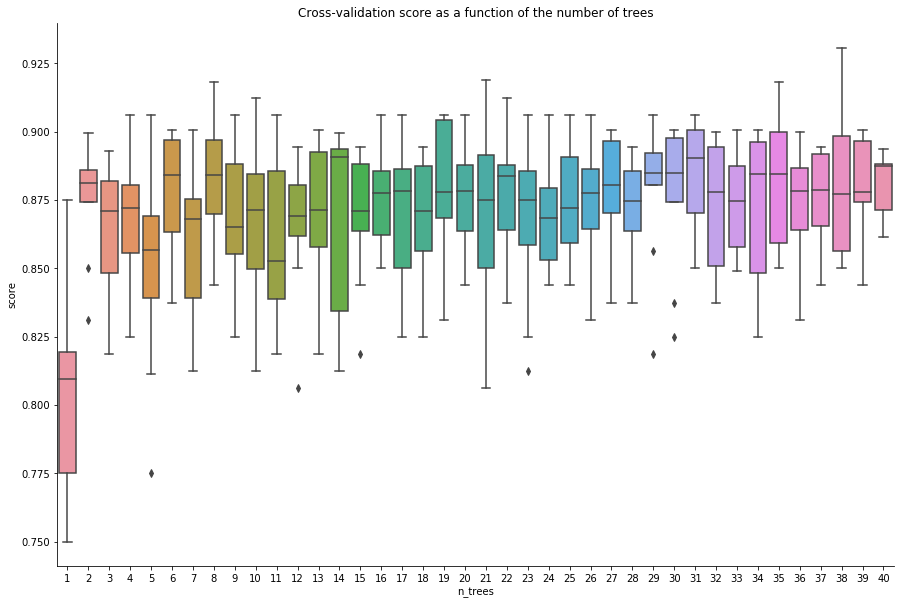

In [5]:
score = []
for n in range(40):
    clf = RandomForestClassifier(n + 1, random_state=n)
    score.append(cross_val_score(clf, X, Y, scoring='accuracy', cv=10))
plt.figure(figsize=(15, 10))
sns.boxplot(list(range(1, 41)), score)
sns.despine()
plt.xlabel('n_trees')
plt.ylabel('score')
plt.title('Cross-validation score as a function of the number of trees')
plt.show()

**(c)** The higher the number of trees, the better cross-validation accuracy. The only tradeoff we should consider is computing costs as it takes more computing power and time to build more trees.

**(d)** These accuracy scores look very promising compared to, say, classifying the wine using a coinflip. However, in binary classification problems, accuracy can be misleading if one class (say, bad wine) is much more common than another (say, good wine), this is, when the classes are **unbalanced**.

We **print** the percentage of wines that are labeled as "bad" in the dataset and **plot the same boxplot** as the last question (feel free to copy/paste), but this time draw a line across the plot denoting the **accuracy** of always guessing zero ("bad wine").

0.864290181363


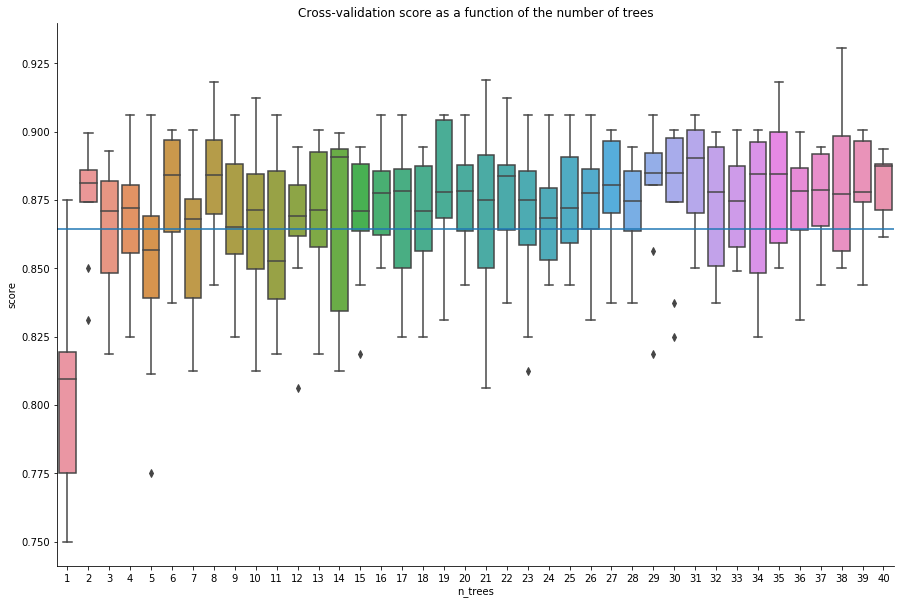

In [6]:
bad_pct = 1 - Y.sum()/len(Y)
print(bad_pct)

plt.figure(figsize=(15, 10))
sns.boxplot(list(range(1, 41)), score)
sns.despine()
plt.xlabel('n_trees')
plt.ylabel('score')
plt.axhline(bad_pct)
plt.title('Cross-validation score as a function of the number of trees')
plt.show()

### Evaluation Metrics

When there are unbalanced classes in a dataset, guessing the more common class will often yield very high accuracy. For this reason, we usually want to use different metrics that are less sensitive to imbalance when evaluating the predictive performance of classifiers. These metrics were originally developed for clinical trials, so to keep with the standard terminology, we define "good" wines (value of 1) as "positive" and the "bad" wines (value of 0) as the "negatives". We then define the following:

$P$ - number of positives in the sample.

$N$ - number of negatives in the sample.

$TP$ - number of true positives: how many of the "positive" guesses of the classifier are true.

$FP$ - number of false positives: how many of the "positive" guesses of the classifier are actually negatives.

$TN$ - number of true negatives; similarly, this is how many of the "negative" guesses of the classifier are true.

$FN$ - number of false negatives; how many of the "negative" guesses are actually positives.

When calling the score functions in scikit-learn we obtained the default measure of efficiency, which is called **accuracy**. This is simply the ratio of successful guesses (both positives and negatives) across all samples:
$$\text{accuracy} = \frac{TP + TN}{P+N}.$$
In our case, when the two classes (good and bad wines) are very unbalanced in the sample, we should look for a better measure of efficiency. 

Usually, the goal is to identify the members of the positive class (the rare class) successfully -- this could be either the good wines or the patients presenting a rare disease. It is common practice to define the following ratios:

The **recall** rate (also called the sensitivity or the true positive rate) is the ratio of true positive guesses among all positives:
$$\text{recall} = \frac{TP}{P}=\frac{TP}{TP+FN}.$$
The **precision** is the ratio of the true positive guesses over all the positive guesses:
$$\text{precision} = \frac{TP}{TP+FP}.$$

**(e)** **Precision** measures the proportion of positive predictions that are actually positive, whilst **recall** measures the proportion of actually positive items that are predicted as positive. Precision would be more important when the cost of false positives is relatively high eg. denying payments from suspicious credit cards, whilst recall would be more important when the cost of false negatives is relatively high eg. diagnosing cancer.

Because precision and recall both provide valuable information about the quality of a classifier, we often want to combine them into a single general-purpose score. The **F1** score is defined as the harmonic mean of recall and precision:
$$F_1 = \frac{2\times\text{recall}\times\text{precision}}{\text{recall} + \text{precision}}.$$

The harmonic mean of two numbers is closer to the smaller of the two numbers than the standard arithmetic mean. The F1 score thus tends to favor classifiers that are strong in both precision and recall, rather than classifiers that emphasize one at the cost of the other.

**(f)** For this part, we **repeat the cross-validation analysis in part (b) changing the `scoring` parameter** of the cross_val_score function such that the measure used is the **F1 score**.

Hint: See the <a href="http://scikit-learn.org/stable/modules/model_evaluation.html">scikit-learn documentation</a> for the options we can use for the *scoring* parameter.

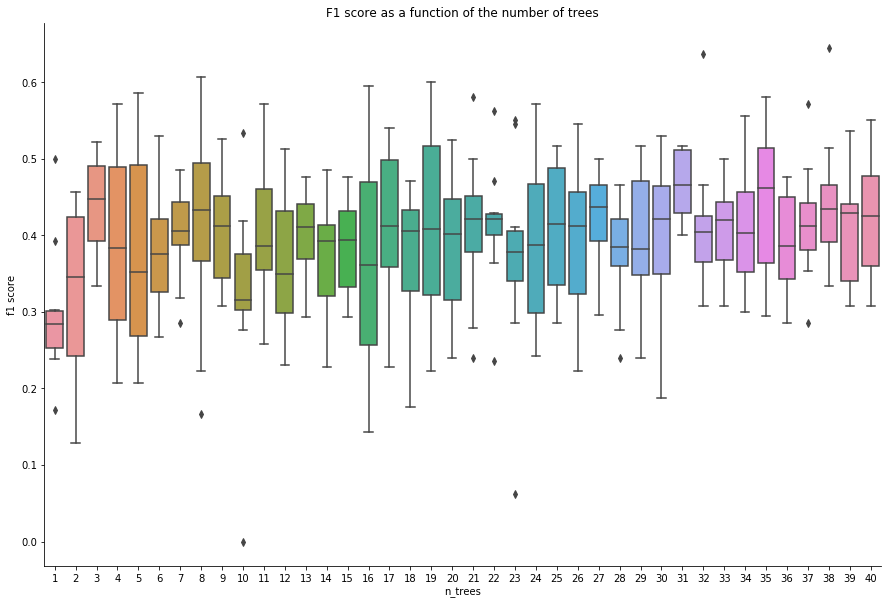

In [7]:
score = []
for n in range(40):
    clf = RandomForestClassifier(n + 1, random_state=n)
    score.append(cross_val_score(clf, X, Y, scoring='f1', cv=10))

plt.figure(figsize=(15, 10))
sns.boxplot(list(range(1, 41)), score)
sns.despine()
plt.xlabel('n_trees')
plt.ylabel('f1 score')
plt.title('F1 score as a function of the number of trees')
plt.show()

Increasing the number of trees, ranging from 1 to 40, has not boosted the F1 score significantly. There might be 2 reasons:
1. Our model still underfits data. We might want to cross-validate on  a larger range of the number of trees or engineer better features.
2. The model does not take into account data imbalance. We might want to fine-tune the decision threshold based on that our model would classify a wine's quality.

### Problem 3: Classifier Calibration

Many classifiers, including random forest classifiers, can return **prediction probabilities**, which can be interpreted as the probability that a given prediction point falls into a given class (i.e., given the data $X$ and a candidate class $c$, the prediction probability states $P(Y = c | X)$). However, when the classes in the training data are **unbalanced**, as in this wine example, these prediction probabilities calculated by a classifier can be inaccurate. This is because many classifiers, again including random forests, do not have a way to internally adjust for this imbalance.

Despite the inaccuracy caused by imbalance, the prediction probabilities returned by a classifier can still be used to construct good predictions if we can choose the right way to turn a prediction probability into a prediction about the class that the datapoint belongs to. We call this task **calibration**.

If a classifier's prediction probabilities are accurate, the appropriate way to convert its probabilities into predictions is to simply choose the class with probability > 0.5. This is the default behavior of classifiers when we call their `predict` method. When the probabilities are inaccurate, this does not work well, but we can still get good predictions by choosing a more appropriate cutoff. In this question, we will choose a cutoff by cross validation.

**(a)** We will fit a random forest classifier to the wine data **using 15 trees**. We compute the **predicted probabilities** that the classifier assigned to each of the training examples (Use the `predict_proba` method of the classifier after fitting.). As a **sanity test**, we construct a prediction based on these predicted probabilities that labels all wines with a predicted probability of being in class 1 > 0.5 with a 1 and 0 otherwise. For example, if originally probabilities $= [0.1,0.4,0.5,0.6,0.7]$, the predictions should be $[0,0,0,1,1]$. We **compare** this to the output of the classifier's `predict` method, and **show that they are the same**. 

In [8]:
clf = RandomForestClassifier(15)
clf.fit(X, Y)
np.array_equal(clf.predict_proba(X)[:, 1] > .5, clf.predict(X))

True

**(b)** We **write a function** `cutoff_predict` that takes a **trained** classifier, a data matrix X, and a cutoff, and generates predictions based on the classifier's predicted **probability and the cutoff value**, as we did in the previous question.

In [9]:
def cutoff_predict(clf, X, cutoff):
    return clf.predict_proba(X)[:, 1] > cutoff

**(c)** Using **10-fold cross validation**, we find a cutoff in `np.arange(0.1,0.9,0.1)` that gives the best average **F1 score** when converting prediction probabilities from a **15-tree** random forest classifier into predictions.

We have provided a function `custom_f1` that takes a cutoff value and returns a function suitable for using as the `scoring` argument to `cross_val_score`. **This function uses the `cutoff_predict` function that we defined in the previous question**.

Using a **boxplot**, we compare the **F1 scores** that correspond to each candidate **cutoff** value.

/Users/Phuc/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Phuc/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Phuc/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


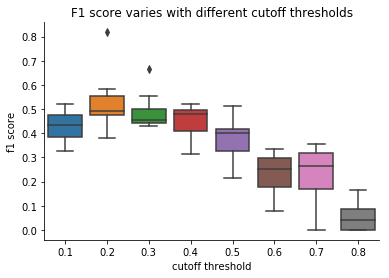

In [10]:
def custom_f1(cutoff):
    def f1_cutoff(clf, X, y):
        ypred = cutoff_predict(clf, X, cutoff)
        return sklearn.metrics.f1_score(y, ypred)
        
    return f1_cutoff

f1_scores = []
for cutoff in np.arange(.1, .9, .1):
    clf = RandomForestClassifier(15, random_state=int(cutoff * 10))
    f1_scores.append(cross_val_score(clf, X, Y, scoring=custom_f1(cutoff), cv=10))

sns.boxplot(np.arange(.1, .9, .1), f1_scores)
sns.despine()
plt.xlabel('cutoff threshold')
plt.ylabel('f1 score')
plt.title('F1 score varies with different cutoff thresholds')
plt.show()

**(d)** According to this analysis, the cutoff value of 0.2 gives the **best predictive results**. This makes sense as there are many more bad wines than good wines and since the model has not been calibrated for such imbalance, being convervative when classifying a wine as good quality actually helps.

### Problem 4: Visualizing Classifiers Using Decision Surfaces

One common visual summary of a classifier is its decision surface. Recall that a trained classifier takes in features $X$ and tries to predict a target $Y$. We can visualize how the classifier translates different inputs $X$ into a guess for $Y$ by plotting the classifier's **prediction probability** (that is, for a given class $c$, the assigned probability that $Y = c$) as a function of the features $X$. Most classifiers in scikit-learn have a method called `predict_proba` that computes this quantity for new examples after the classifier has been trained.

**(a)** Decision surface visualizations are really only meaningful if they are plotted against inputs $X$ that are one- or two-dimensional. So before we plot these surfaces, we will first find **two "important" dimensions** of $X$ to focus on. Recall that we can use SVD to perform a similar task. Here, we will use a different dimension reduction method based on random forests.

Random forests allow us to compute a heuristic for determining how "important" a feature is in predicting a target. This heuristic measures the change in prediction accuracy if we take a given feature and permute (scramble) it across the datapoints in the training set. The  more the accuracy drops when the feature is permuted, the more "important" we can conclude the feature is. Importance can be a useful way to select a small number of features for visualization.

As we did in the last question, train a random forest classifier on the wine data using **15 trees**. We use the `feature_importances_` attribute of the classifier to obtain the relative importance of the features. These features are the columns of the dataframe. We'll show a simple **bar plot** showing the relative importance of the named features of the wines in the databes.

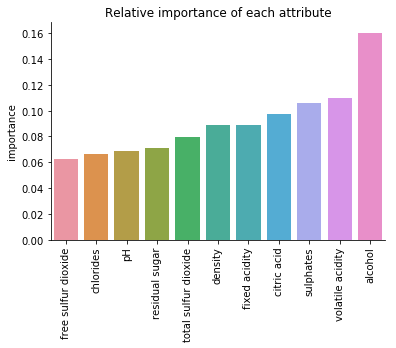

In [11]:
clf = RandomForestClassifier(15)
clf.fit(X, Y)
importance, features = zip(*sorted(zip(clf.feature_importances_, red.columns)))
sns.barplot(list(features), importance)
sns.despine()
plt.xticks(rotation=90)
plt.ylabel('importance')
plt.title('Relative importance of each attribute')
plt.show()

**(b)** Below, we have been provided with a function `plot_decision_surface` that plots a classifier's decision surface, taking as arguments a classifier object, a two-column feature matrix, and a target vector.

Using this function and the results from the "importance" analysis above, we **subset** the data matrix to include just the **two features of highest importance**. Then we **plot** the decision surfaces of a <a href='http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier'>decision tree classifier</a>, a random forest classifier with **number of trees set to 15**, and a <a href='http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'> support vector machine</a> **with `C` set to 100, and `gamma` set to 1.0**. 

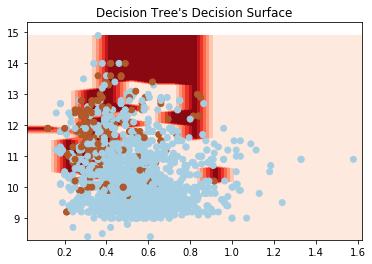

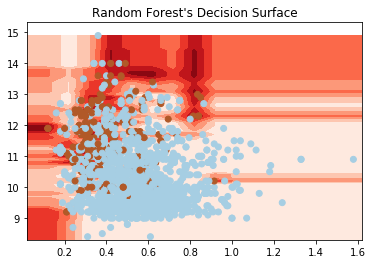

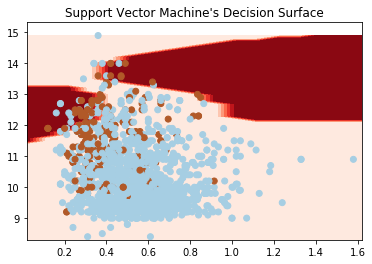

In [12]:
# Adapt from sklearn http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html
def plot_decision_surface(clf, X_train, Y_train):
    plot_step = .1
    
    if X_train.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = X_train[:, 0].min() - plot_step, X_train[:, 0].max() + plot_step
    y_min, y_max = X_train[:, 1].min() - plot_step, X_train[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf.fit(X_train, Y_train)
    if hasattr(clf, 'predict_proba'):
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Reds)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=plt.cm.Paired)
    plt.show()
    
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier(15)
clf3 = SVC(100, gamma=1)

# Select the 2 most important features
important_X = X[:, red.columns.isin(features[-2:])]

plt.title('Decision Tree\'s Decision Surface')
plot_decision_surface(clf1, important_X, Y)
plt.title('Random Forest\'s Decision Surface')
plot_decision_surface(clf2, important_X, Y)
plt.title('Support Vector Machine\'s Decision Surface')
plot_decision_surface(clf3, important_X, Y)

**(c)** Recall that there is a tradeoff between the bias and the variance of a classifier. We want to choose a model that generalizes well to unseen data. With a **high-variance** classifier we run the risk of **overfitting** to noisy or unrepresentative training data. In contrast, classifier with a **high bias** typically produce simpler models that tend to **underfit** the training data, failing to capture important regularities.

The decision surface of a single decision tree and espescially of a random forest have high **complexity** and **sensitivity** to the training data. That of the support vector machine is smoother. The first 2 suffer from high **variance** and overfit the data, whilst the last one overfits the data less but have high **bias**.

**(d)** The <a href='http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC'> SVM</a> implementation of sklearn has an **optional parameter** `class_weight`. This parameter is set to `None` per default, but it also provides an `balanced` mode, which uses the values of the labels Y to **automatically adjust weights** inversely proportional to class frequencies. As done in sub-problem 4(b), we **draw the decision boundaries** for two SVM classifiers. We **use `C=1.0`, and `gamma=1.0`** for **both** models, but for the first SVM we set `class_weigth` to **`None`**, and for the second SVM set `class_weigth` to **`'auto'`**.

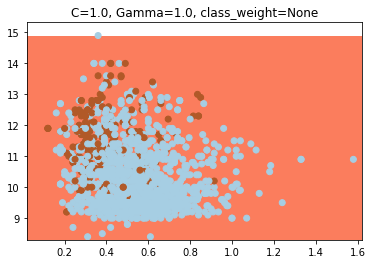

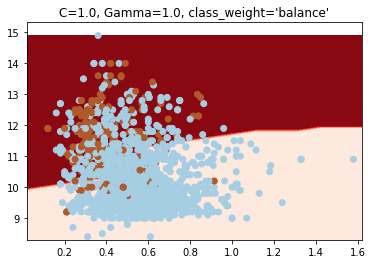

In [13]:
clf1 = SVC(gamma=1)
clf2 = SVC(gamma=1, class_weight='balanced')

plt.title('C=1.0, Gamma=1.0, class_weight=None')
plot_decision_surface(clf1, important_X, Y)
plt.title('C=1.0, Gamma=1.0, class_weight=\'balance\'')
plot_decision_surface(clf2, important_X, Y)

**(e)** After balancing the class weight, the model has lower **precision** but better **recall**. The **overall predicting performance** of both classifiers are not good with many wines mislabeled. To **improve** the performance further, we could fine-tune the hyperparameters to pick the best set of C, gamma, and class_weight. However, with only these 2 features, the wine classes are not linearly separable. We should consider including all the attributes in the model and perharps engineering better features.